### Task - 2

**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data**



In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
os.chdir(r"C:\\Users\\Omkar\\Downloads\\titanic")

In [6]:
df = pd.read_csv("test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

**Let's begin some exploratory data analysis! We'll start by checking out missing data!**

In [8]:
df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

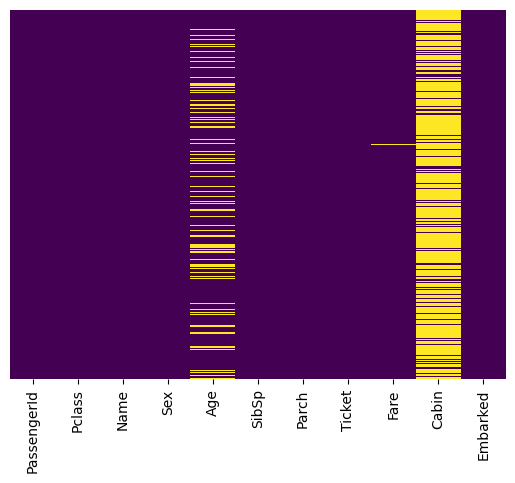

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\Omkar\AppData\Local\Temp\ipykernel_5892\2657660848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

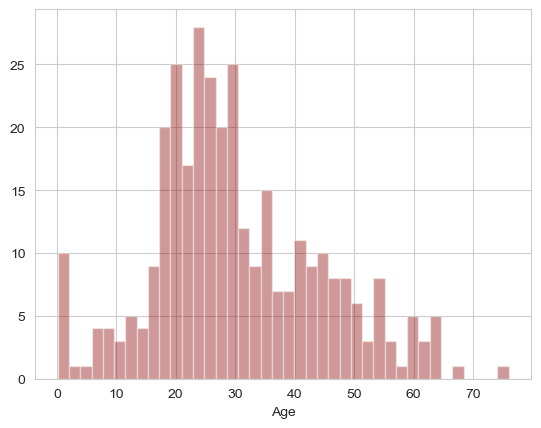

In [21]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: >

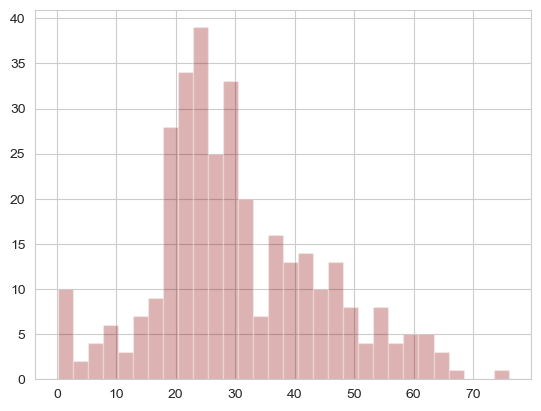

In [22]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)


<Axes: xlabel='SibSp', ylabel='count'>

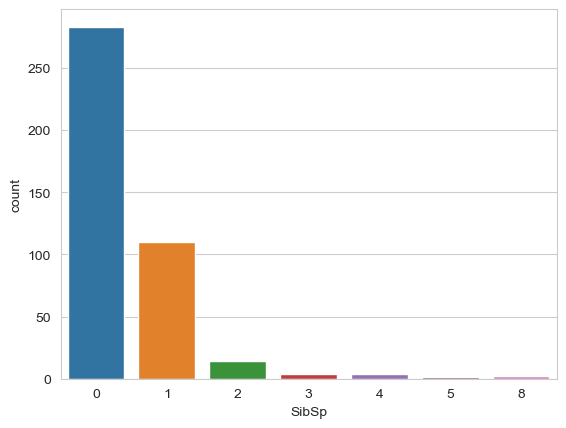

In [24]:
sns.countplot(x='SibSp',data=df)


<Axes: >

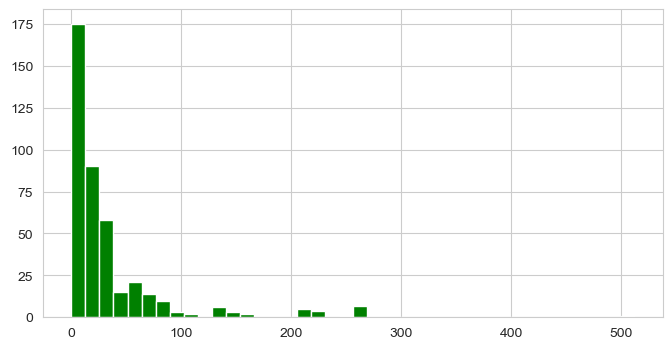

In [25]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))


Data Cleaning


<Axes: xlabel='Pclass', ylabel='Age'>

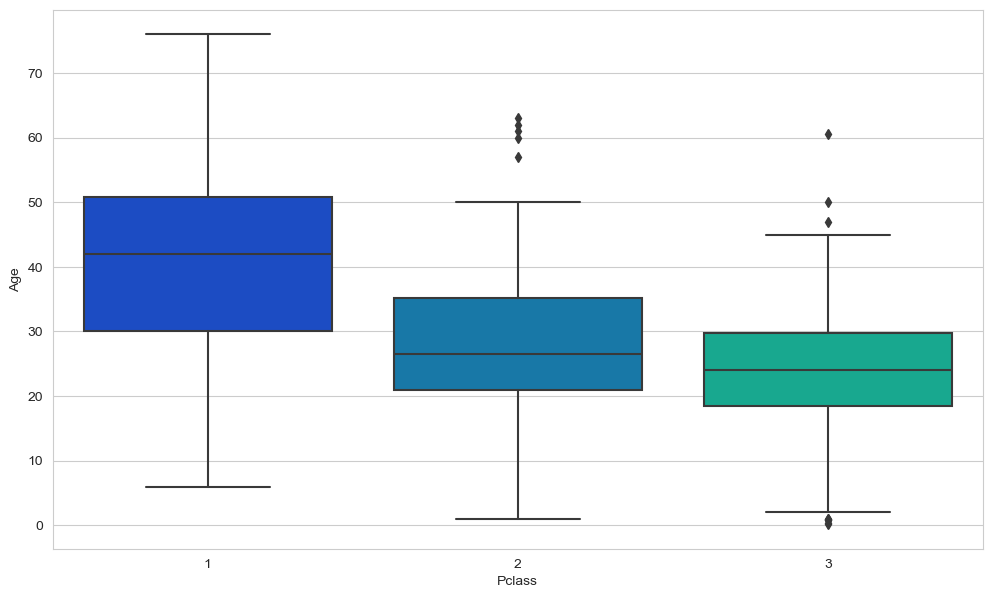

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [35]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [33]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)


C:\Users\Omkar\AppData\Local\Temp\ipykernel_5892\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Omkar\AppData\Local\Temp\ipykernel_5892\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Now let's check that heat map again!



<Axes: >

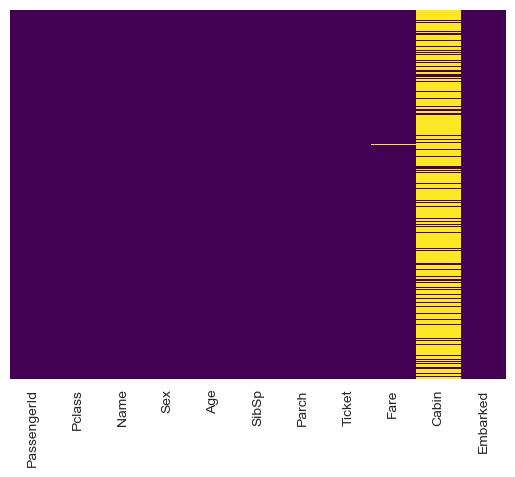

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [36]:
df.drop('Cabin',axis=1,inplace=True)


In [37]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [39]:
df.dropna(inplace=True)


Converting Categorical Features


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [42]:
pd.get_dummies(df['Embarked'],drop_first=True).head()


,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


In [45]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [46]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [47]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).



df Test Split


In [60]:
df.drop('Parch',axis=1).head(50)


,PassengerId,Pclass,Age,SibSp,Fare
0,892,3,34.5,0,7.8292
1,893,3,47.0,1,7.0000
2,894,2,62.0,0,9.6875
3,895,3,27.0,0,8.6625
4,896,3,22.0,1,12.2875
5,897,3,14.0,0,9.2250
6,898,3,30.0,0,7.6292
7,899,2,26.0,1,29.0000
8,900,3,18.0,0,7.2292
9,901,3,21.0,2,24.1500


In [54]:
df['Parch'].head()


0    0
1    0
2    0
3    0
4    1
Name: Parch, dtype: int64

In [57]:
df['Age'].head()


0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [58]:
df['PassengerId'].head()


0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

### Age

**conclusions**

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

In [64]:
df['Age'].describe()

count    417.000000
mean      29.247002
std       12.828594
min        0.170000
25%       23.000000
50%       25.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

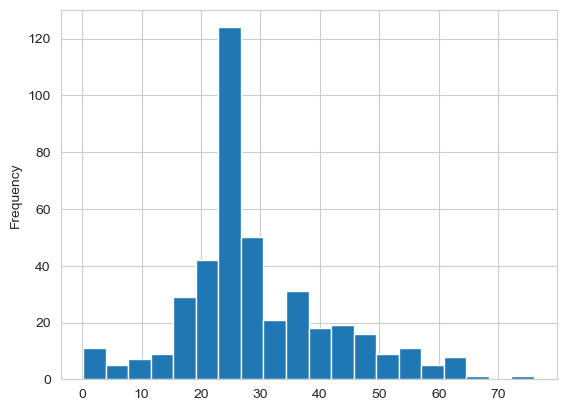

In [65]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

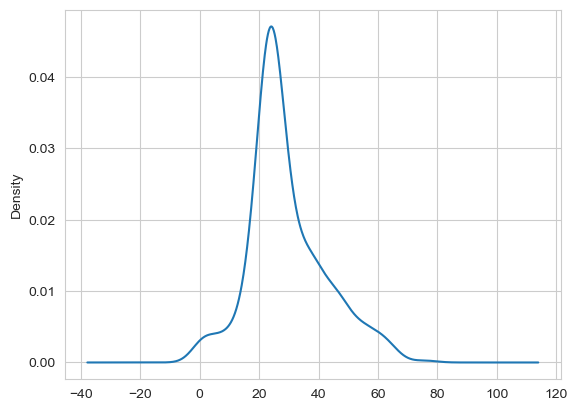

In [66]:
df['Age'].plot(kind='kde')

In [67]:
df['Age'].skew()

0.6836786766716747

<Axes: >

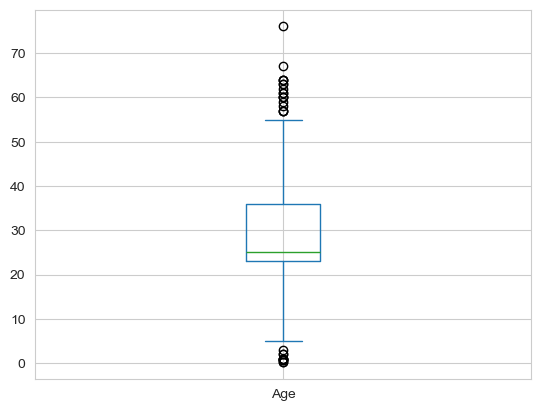

In [68]:
df['Age'].plot(kind='box')

In [69]:
df['Age'].isnull().sum()/len(df['Age'])

0.0

### Fare

**conclusions**

- The data is highly(positively) skewed
- Fare col actually contains the group fare and not the individual fare(This migth be and issue)
- We need to create a new col called individual fare

In [70]:
df['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

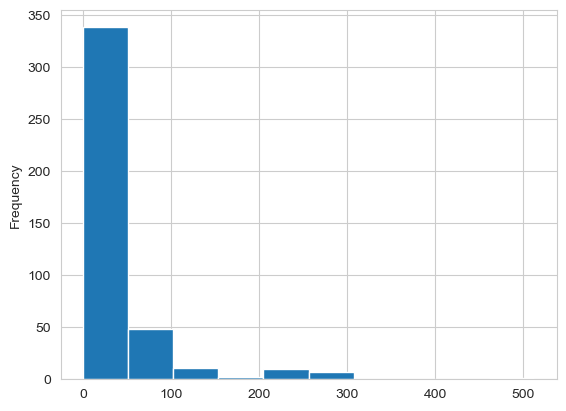

In [71]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

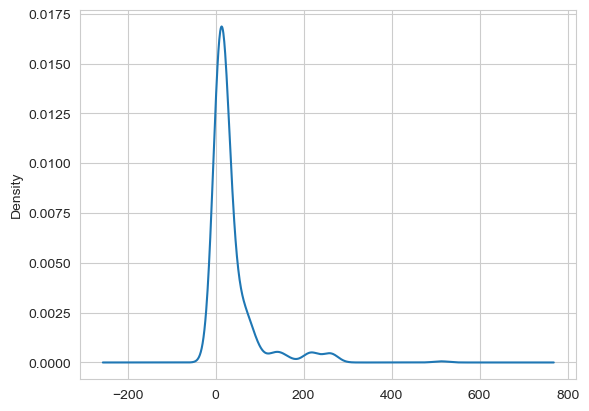

In [72]:
df['Fare'].plot(kind='kde')

In [73]:
df['Fare'].skew()

3.6872133081121405

<Axes: >

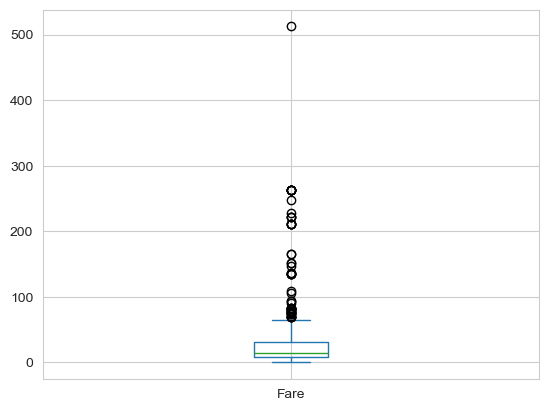

In [74]:
df['Fare'].plot(kind='box')

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### PassengerId

In [76]:
df['PassengerId'].value_counts()

PassengerId
892     1
1102    1
1178    1
1177    1
1176    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 417, dtype: int64

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot.<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap
        
- Write your conclusions

Text(0.5, 1.0, 'Missing values heatmap')

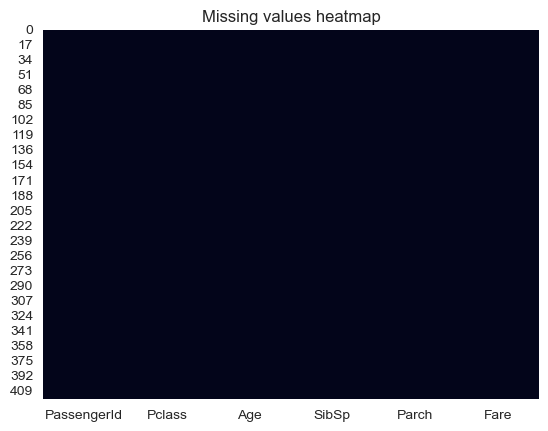

In [84]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

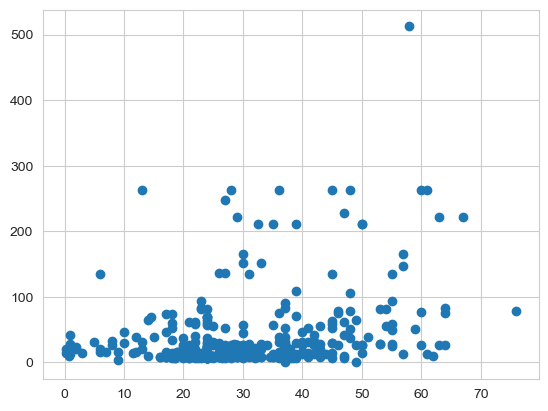

In [85]:
plt.scatter(df["Age"], df["Fare"])

### Coclution
**The data cleaning and EDA process enabled us to uncover critical factors influencing the survival of Titanic passengers. Key determinants of survival included gender, passenger class, age, fare, and family size. These insights not only help in understanding the tragic event of the Titanic but also serve as a valuable exercise in the application of data science techniques to real-world datasets.**

**By thoroughly cleaning the data and performing detailed EDA, we have laid a strong foundation for any further analysis, such as predictive modeling or hypothesis testing. This project underscores the importance of data preprocessing and exploratory analysis in deriving meaningful insights from complex datasets.**